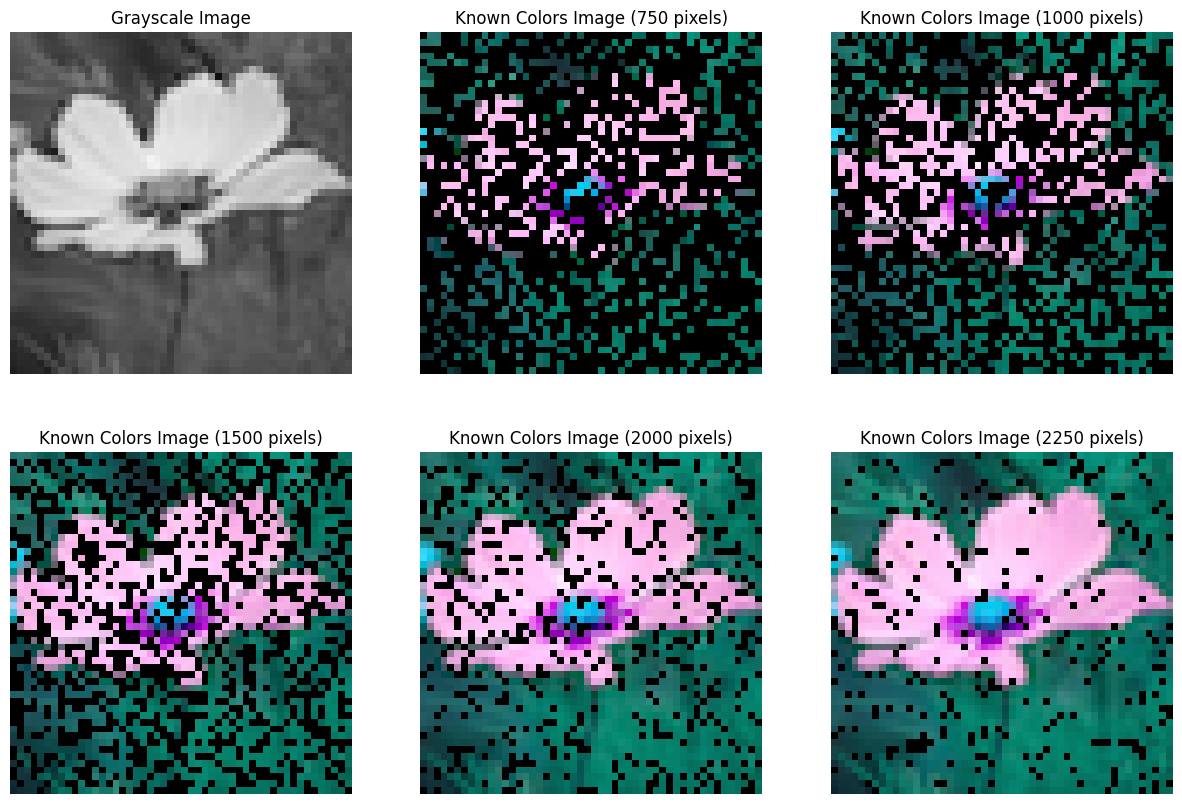

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_normalize_image(image_path):
    """Load an image and normalize it to [0, 1]."""
    image = cv2.imread(image_path) / 255.0
    return image

def convert_to_grayscale(colored_image):
    """Convert a colored image to grayscale using the specified formula."""
    R = colored_image[:, :, 0]
    G = colored_image[:, :, 1]
    B = colored_image[:, :, 2]
    grayscale_image = 0.299 * R + 0.587 * G + 0.114 * B
    return grayscale_image.astype(np.float32)

def generate_known_colors_image(colored_image, num_pixels_to_keep):
    """Generate an image with a specified number of known colors."""
    known_colors_image = np.zeros_like(colored_image)
    
    # Randomly choose indices for known pixels
    indices = np.random.choice(colored_image.shape[0] * colored_image.shape[1], 
                            size=num_pixels_to_keep, replace=False)
    
    # Reshape the images for easier pixel assignment
    known_colors_image = known_colors_image.reshape(-1, 3)
    colored_image_flat = colored_image.reshape(-1, 3)
    
    # Assign the known colors to the known_colors_image
    known_colors_image[indices] = colored_image_flat[indices]
    
    # Reshape back to the original image shape
    return known_colors_image.reshape(colored_image.shape)

def save_image(image, filename):
    """Save an image to a file after scaling to [0, 255] and converting to uint8."""
    cv2.imwrite(filename, image * 255.0)

def plot_images(grayscale_image, known_colors_images, titles):
    """Plot the grayscale image and a list of known colors images."""
    grayscale_image_rgb = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)

    # Determine the number of rows and columns needed
    max_per_row = 3
    num_images = len(known_colors_images) + 1  # +1 for the grayscale image
    num_rows = (num_images + max_per_row - 1) // max_per_row  # Ceiling division
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, max_per_row, figsize=(max_per_row * 5, num_rows * 5))
    
    # Flatten the axs array for easy indexing
    axs = axs.flatten() if num_rows > 1 else [axs]
    
    axs[0].imshow(grayscale_image_rgb)
    axs[0].set_title('Grayscale Image')
    axs[0].axis('off')
    
    # Plot the known colors images
    for i, (known_colors_image, title) in enumerate(zip(known_colors_images, titles), start=1):
        axs[i].imshow(known_colors_image)
        axs[i].set_title(title)
        axs[i].axis('off')
    
    # Hide any unused subplots
    for ax in axs[num_images:]:
        ax.axis('off')
    
    plt.show()

def main():
    # Step 1: Load the fully colored image
    colored_image = load_and_normalize_image('flower.png')
    
    # Step 2: Convert the colored image to grayscale
    grayscale_image = convert_to_grayscale(colored_image)
    
    # Step 3: Generate known colors images with different numbers of pixels
    num_pixels_list = [750,1000,1500,2000,2250]
    known_colors_images = [generate_known_colors_image(colored_image, num_pixels) for num_pixels in num_pixels_list]
    
    # Step 4: Save the grayscale and known colors images
    save_image(grayscale_image, 'grayscale_image.png')
    for num_pixels, known_colors_image in zip(num_pixels_list, known_colors_images):
        save_image(known_colors_image, f'known_colors_image_{num_pixels}.png')
    
    # Step 5: Plot the results
    titles = [f'Known Colors Image ({num_pixels} pixels)' for num_pixels in num_pixels_list]
    plot_images(grayscale_image, known_colors_images, titles)

if __name__ == "__main__":
    main()
